In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sheryanalysis as sh
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [124]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
df.shape

(614, 13)

In [126]:
df  = df.dropna(subset=['Gender'])

In [127]:
df.isnull().sum()


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
df['Married'].fillna(df['Married'].mode()[0], inplace= True)

In [129]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [130]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)

In [131]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [132]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [133]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [134]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (601, 13)
🧱 Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

✅ No null values found

🔠 Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

🔢 Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

📝 Text Columns: ['Loan_ID']


{'shape': (601, 13),
 'columns': ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History',
  'Property_Area',
  'Loan_Status'],
 'dtypes': {'Loan_ID': dtype('O'),
  'Gender': dtype('O'),
  'Married': dtype('O'),
  'Dependents': dtype('O'),
  'Education': dtype('O'),
  'Self_Employed': dtype('O'),
  'ApplicantIncome': dtype('int64'),
  'CoapplicantIncome': dtype('float64'),
  'LoanAmount': dtype('float64'),
  'Loan_Amount_Term': dtype('float64'),
  'Credit_History': dtype('float64'),
  'Property_Area': dtype('O'),
  'Loan_Status': dtype('O')},
 'null_counts': {'Loan_ID': 0,
  'Gender': 0,
  'Married': 0,
  'Dependents': 0,
  'Education': 0,
  'Self_Employed': 0,
  'ApplicantIncome': 0,
  'CoapplicantIncome': 0,
  'LoanAmount': 0,
  'Loan_Amount_Term': 0,
  'Credit_History': 0,
  'Property_Area': 0,
  'Loan_Status': 0},
 'total_rows': 601,
 'column_types': {'

In [135]:
df['Self_Employed']

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 601, dtype: object

<Axes: xlabel='Gender', ylabel='count'>

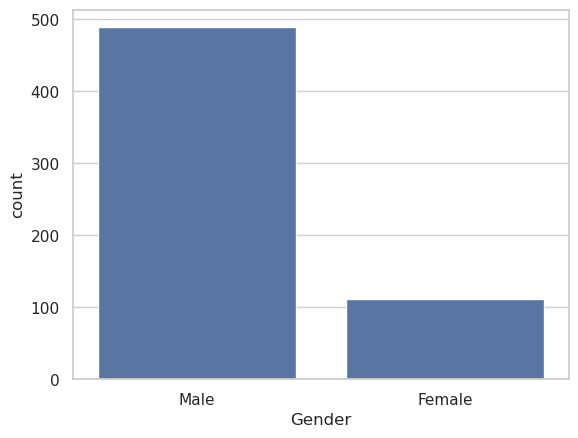

In [136]:
sns.countplot(x='Gender', data=df)



<Axes: xlabel='LoanAmount', ylabel='Count'>

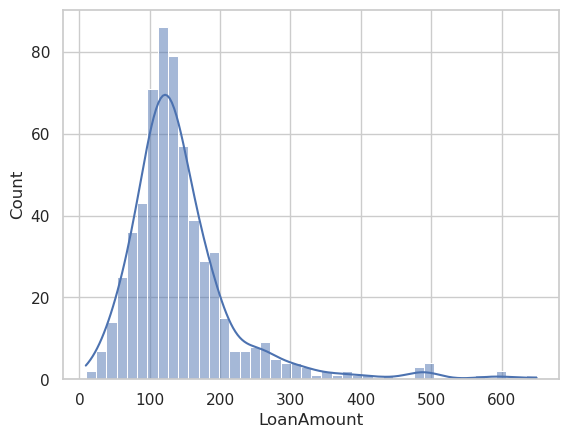

In [137]:
sns.histplot(df['LoanAmount'], kde=True)

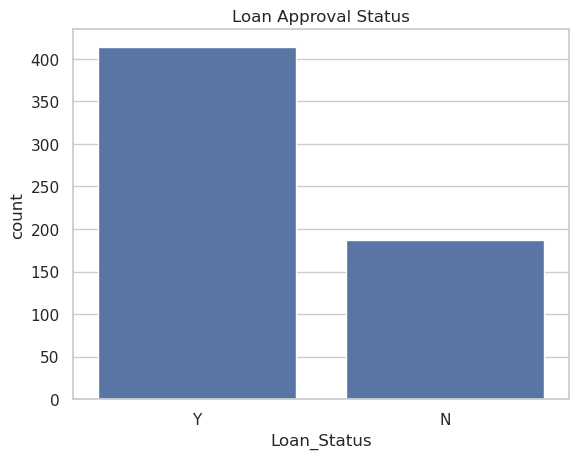

In [138]:
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Status')
plt.show()
# so most of the loans are approved

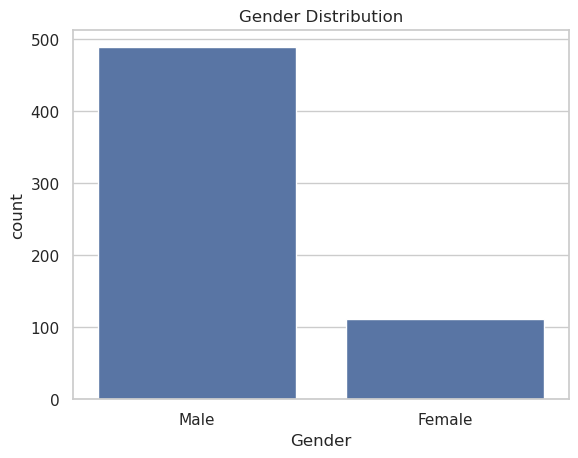

In [139]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()
# male are definitely more into the loan

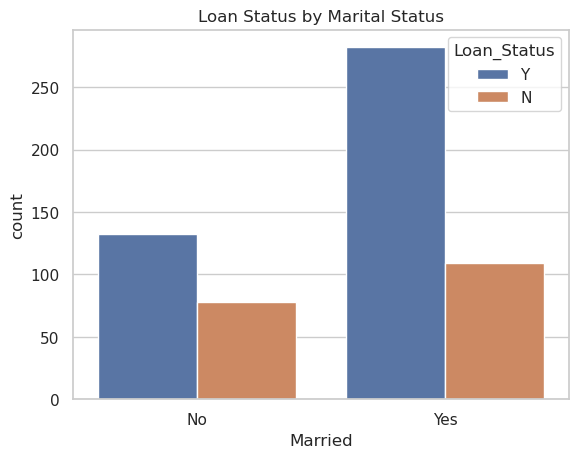

In [140]:
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title('Loan Status by Marital Status')
plt.show()
# So the one mariied and a man got more loan as compare to the one whi are not married female are approximately same

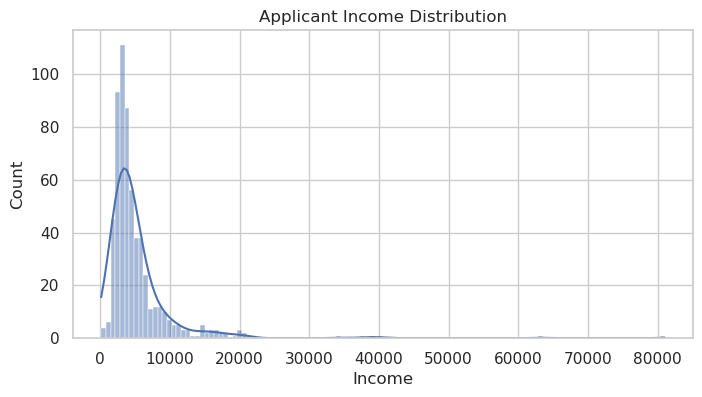

In [141]:
plt.figure(figsize=(8, 4))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.show()
# So the one with the income between the 0 and 10k apply more for the loan

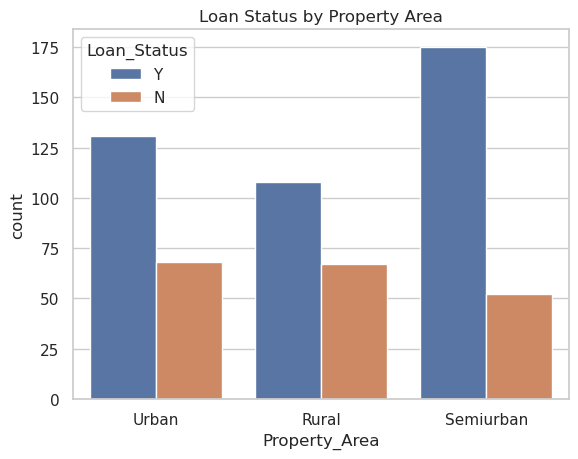

In [142]:
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title('Loan Status by Property Area')
plt.show()
# The people in the semiuraban gets the most loan rural and urban are approx same


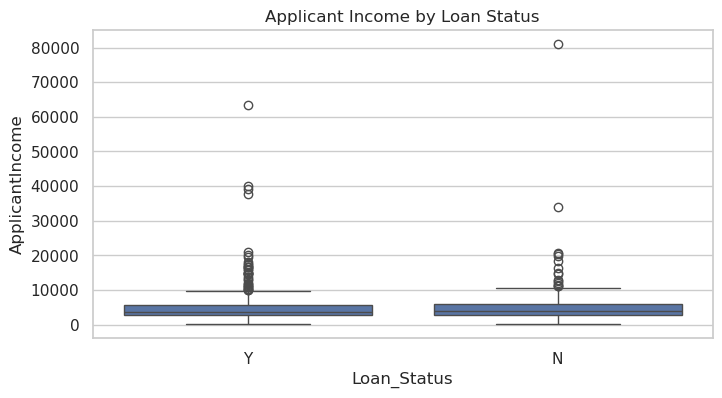

In [143]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income by Loan Status')
plt.show()
# They are same but the ouliers make the whole difference

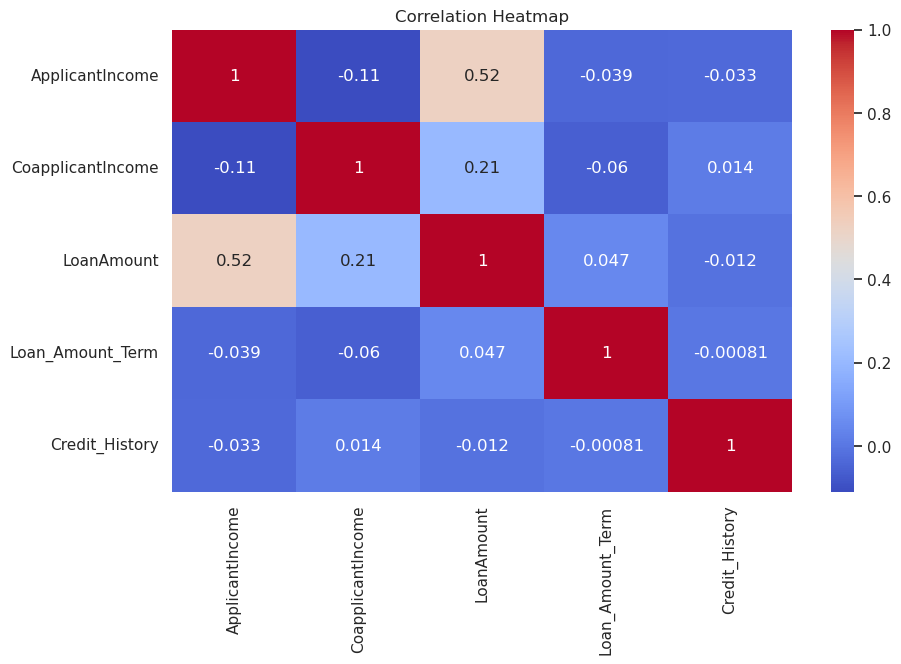

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# so we can use the application income with the loan amount given

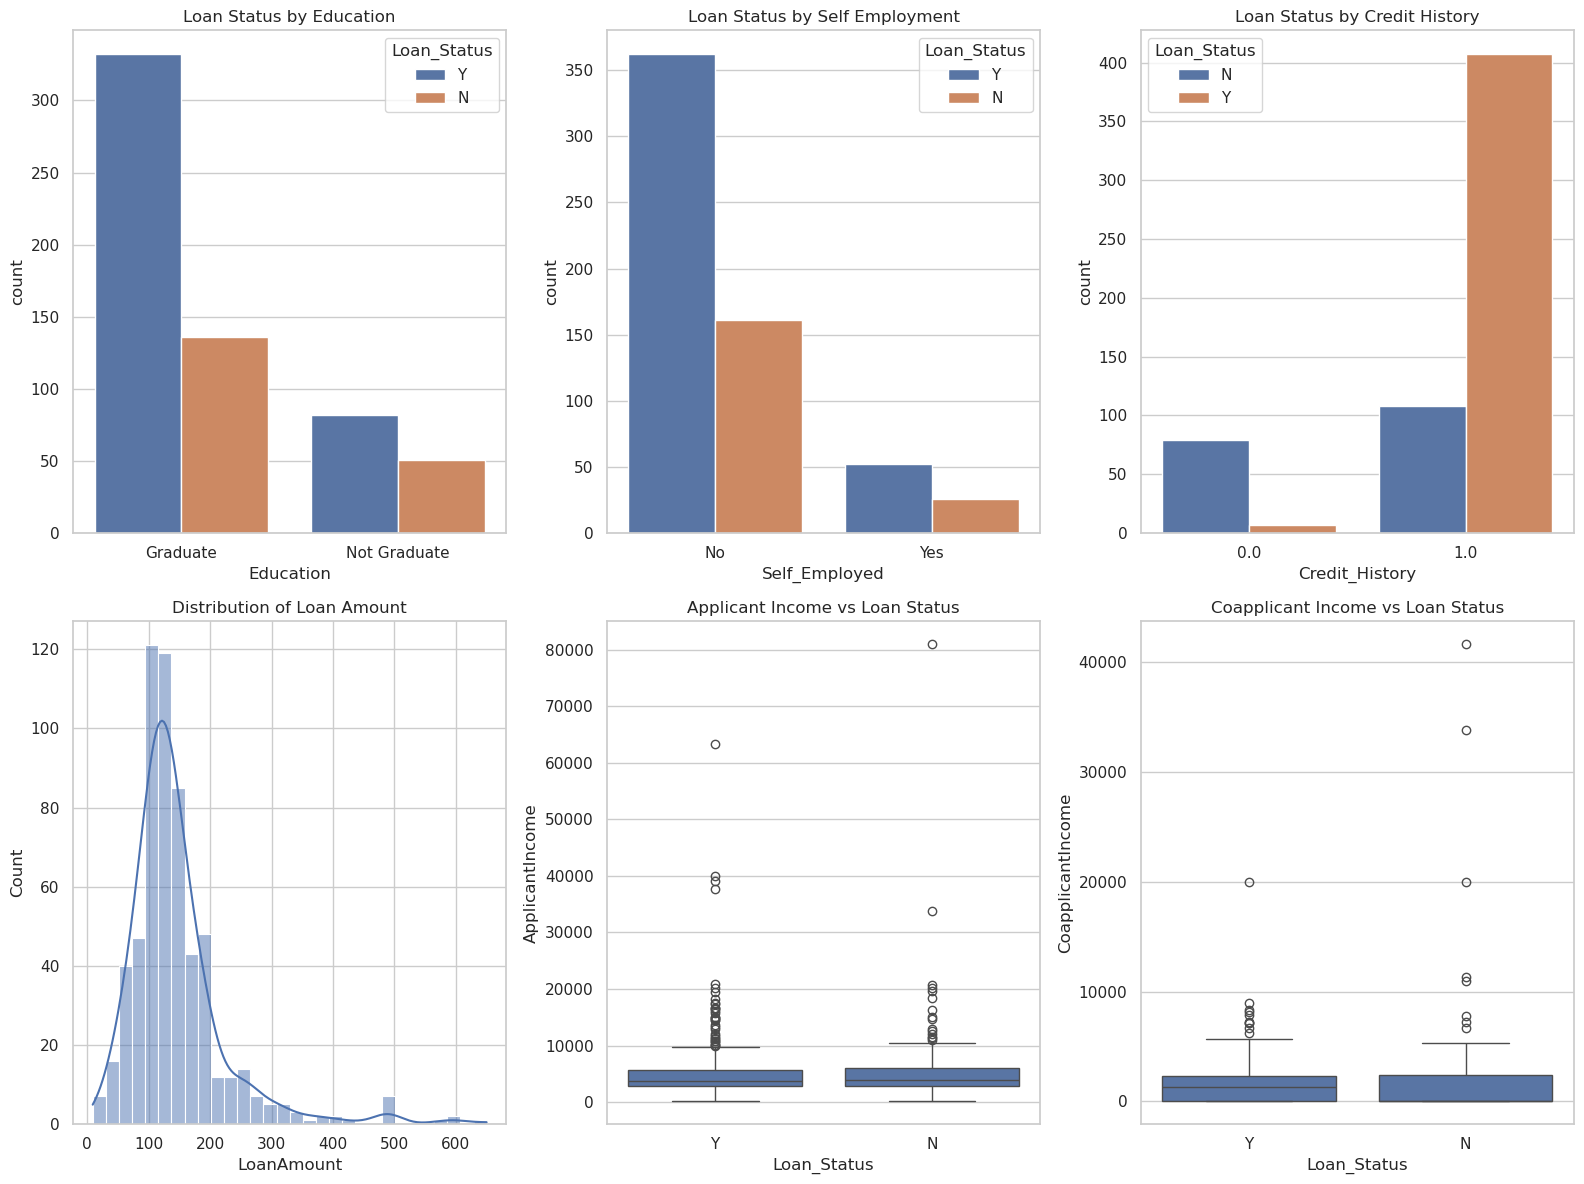

In [145]:


sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))


plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Loan Status by Education')
# so the gradute often get their loan accepted

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title('Loan Status by Self Employment')
# The one who are not self-employed got more loan accepted

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Loan Status by Credit History')
# Those with the credit hsitory of 1 set more loan accepted

plt.subplot(2, 3, 4)
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
# Most of the value lies between 0 and 300

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income vs Loan Status')
# Applicant income has no such effect but keeping it due to loan_amount

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Loan_Status', y='CoapplicantIncome')
plt.title('Coapplicant Income vs Loan Status')
# Not so good can be dropped

plt.tight_layout()
plt.show()


In [146]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [147]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()
label_column = ['Married', 'Self_Employed', 'Education', 'Gender', 'Credit_History', 'Loan_Status']
scaler_column = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

label_column = ['Married', 'Self_Employed', 'Education', 'Gender', 'Credit_History', 'Loan_Status']
encoders = {}

for col in label_column:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 

df[scaler_column] = scaler.fit_transform(df[scaler_column])


# Here the values are scaled


In [148]:
# Print LabelEncoder mappings for each label-encoded column
for col in label_column:
    le = encoders[col]
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Married: {'No': np.int64(0), 'Yes': np.int64(1)}
Self_Employed: {'No': np.int64(0), 'Yes': np.int64(1)}
Education: {'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Credit_History: {np.float64(0.0): np.int64(0), np.float64(1.0): np.int64(1)}
Loan_Status: {'N': np.int64(0), 'Y': np.int64(1)}


In [149]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.095343,0.0,0.000000,0.271725,1,Urban,1
1,LP001003,1,1,1,0,0,-0.123253,1508.0,-0.210168,0.271725,1,Rural,0
2,LP001005,1,1,0,0,1,-0.396584,0.0,-0.975885,0.271725,1,Urban,1
3,LP001006,1,1,0,1,0,-0.468586,2358.0,-0.308970,0.271725,1,Urban,1
4,LP001008,1,0,0,0,0,0.121416,0.0,-0.049614,0.271725,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.413850,0.0,-0.914134,0.271725,1,Rural,1
610,LP002979,1,1,3+,0,0,-0.205615,0.0,-1.296993,-2.511911,1,Rural,1
611,LP002983,1,1,1,0,0,0.479181,240.0,1.333617,0.271725,1,Urban,1
612,LP002984,1,1,2,0,0,0.394747,0.0,0.518498,0.271725,1,Urban,1


In [150]:
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first= True)

In [151]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.095343,0.0,0.000000,0.271725,1,1,False,False,False,False,True
1,LP001003,1,1,0,0,-0.123253,1508.0,-0.210168,0.271725,1,0,True,False,False,False,False
2,LP001005,1,1,0,1,-0.396584,0.0,-0.975885,0.271725,1,1,False,False,False,False,True
3,LP001006,1,1,1,0,-0.468586,2358.0,-0.308970,0.271725,1,1,False,False,False,False,True
4,LP001008,1,0,0,0,0.121416,0.0,-0.049614,0.271725,1,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,-0.413850,0.0,-0.914134,0.271725,1,1,False,False,False,False,False
610,LP002979,1,1,0,0,-0.205615,0.0,-1.296993,-2.511911,1,1,False,False,True,False,False
611,LP002983,1,1,0,0,0.479181,240.0,1.333617,0.271725,1,1,True,False,False,False,True
612,LP002984,1,1,0,0,0.394747,0.0,0.518498,0.271725,1,1,False,True,False,False,True


In [152]:
df.drop('CoapplicantIncome', axis=1, inplace=True)


In [153]:
df.drop('Loan_ID', axis=1, inplace=True, errors='ignore')
df.astype(int)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1,1,0,1,0,0,0,1,1,0,0,0,0,1
3,1,1,1,0,0,0,0,1,1,0,0,0,0,1
4,1,0,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,1,1,0,0,0,0,0
610,1,1,0,0,0,-1,-2,1,1,0,0,1,0,0
611,1,1,0,0,0,1,0,1,1,1,0,0,0,1
612,1,1,0,0,0,0,0,1,1,0,1,0,0,1


In [154]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=42)


In [156]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)
# balancing our data-set


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(x_test)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
[[13 16]
 [ 8 84]]
              precision    recall  f1-score   support

           0       0.62      0.45      0.52        29
           1       0.84      0.91      0.88        92

    accuracy                           0.80       121
   macro avg       0.73      0.68      0.70       121
weighted avg       0.79      0.80      0.79       121



In [158]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(x_test)

print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[13 16]
 [ 7 85]]
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        29
           1       0.84      0.92      0.88        92

    accuracy                           0.81       121
   macro avg       0.75      0.69      0.71       121
weighted avg       0.80      0.81      0.80       121



In [159]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)
y_pred_nb = nb.predict(x_test)

print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[14 15]
 [ 7 85]]
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        29
           1       0.85      0.92      0.89        92

    accuracy                           0.82       121
   macro avg       0.76      0.70      0.72       121
weighted avg       0.81      0.82      0.81       121



In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
[[14 15]
 [12 80]]
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        29
           1       0.84      0.87      0.86        92

    accuracy                           0.78       121
   macro avg       0.69      0.68      0.68       121
weighted avg       0.77      0.78      0.77       121



In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(x_test)

print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[15 14]
 [25 67]]
              precision    recall  f1-score   support

           0       0.38      0.52      0.43        29
           1       0.83      0.73      0.77        92

    accuracy                           0.68       121
   macro avg       0.60      0.62      0.60       121
weighted avg       0.72      0.68      0.69       121



In [162]:
import joblib
joblib.dump(svm, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(x.columns.tolist(), "columns.pkl")



['columns.pkl']

In [163]:
X_train_res.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')